<IPython.core.display.Javascript object>


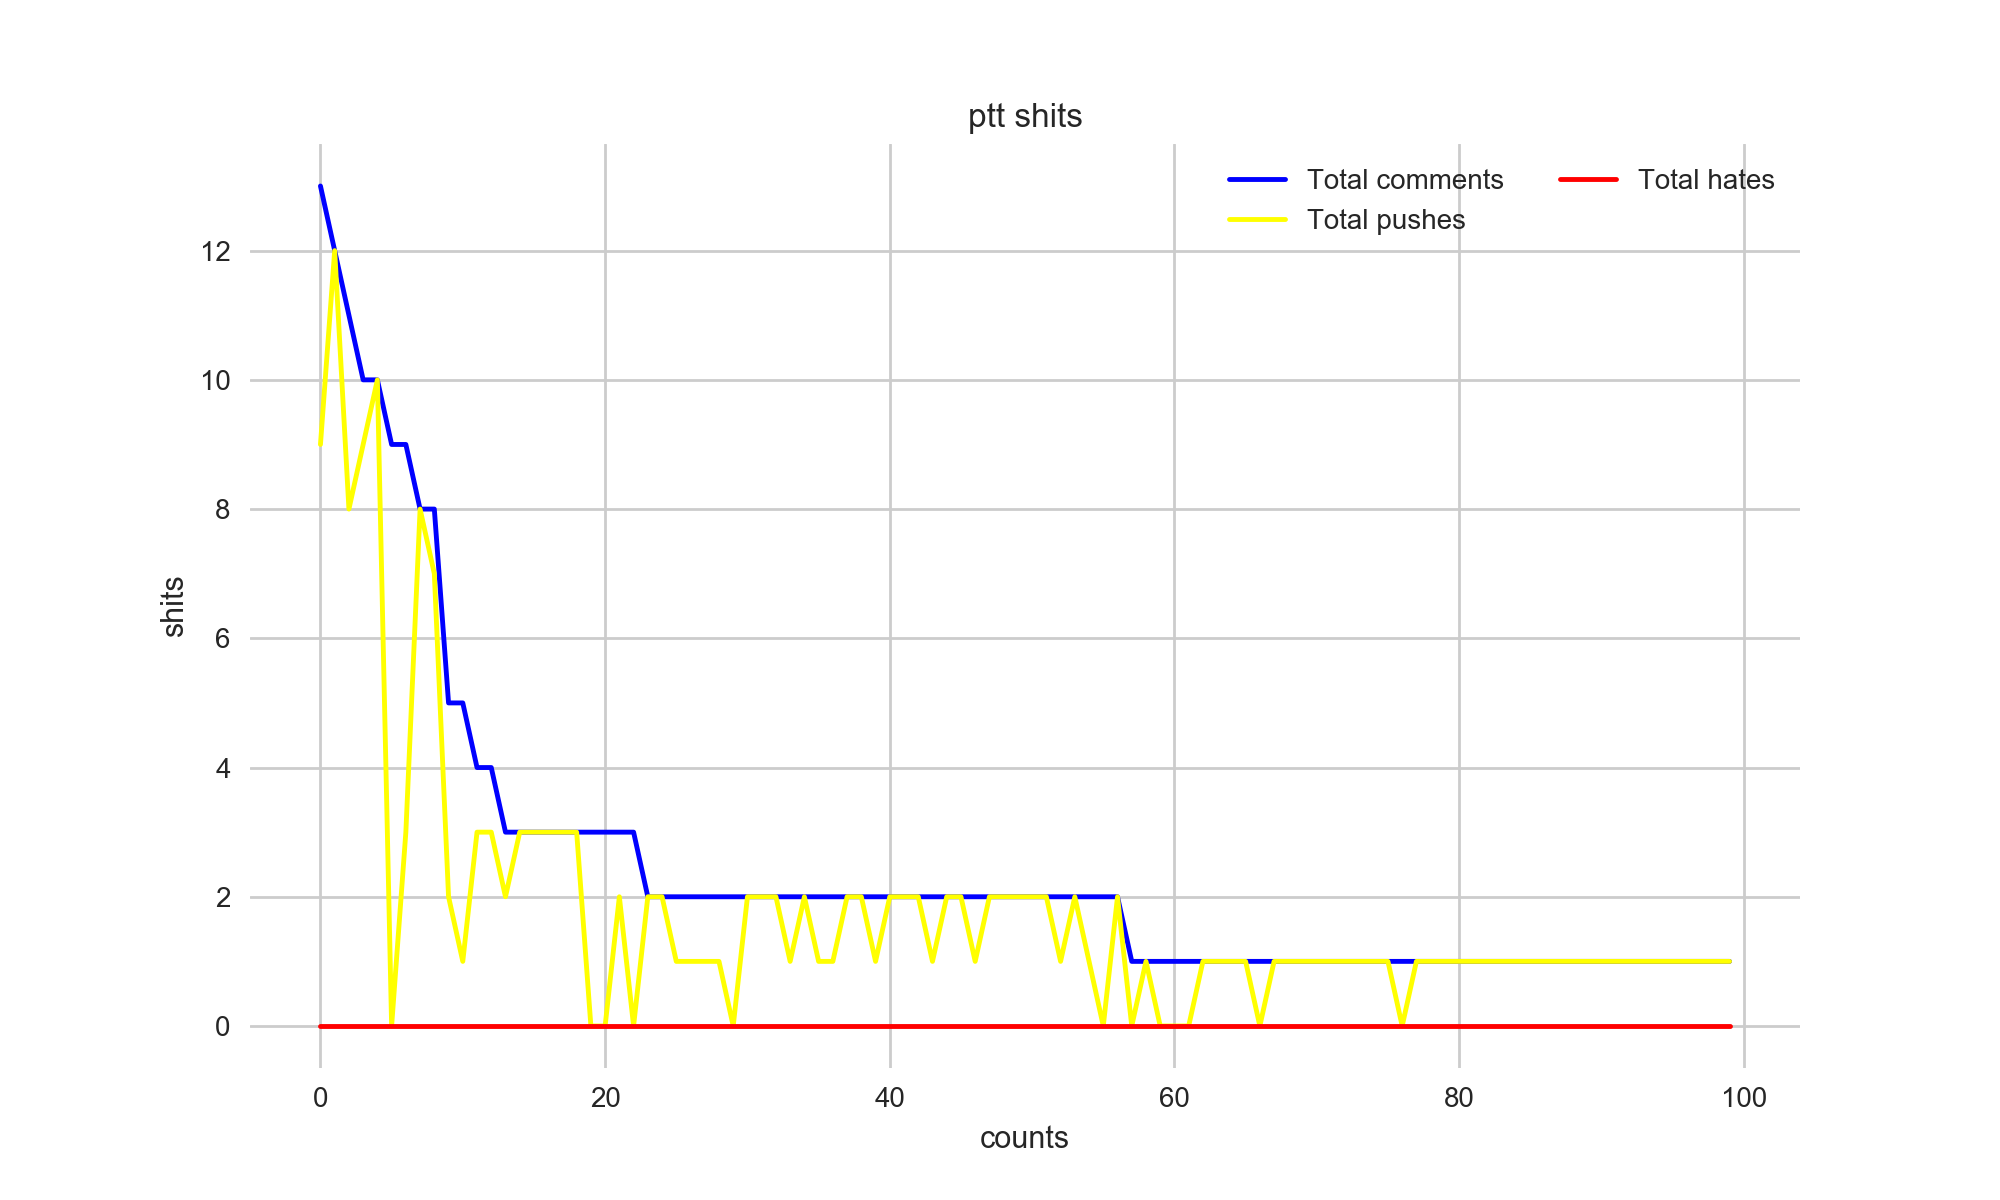

In [20]:
%matplotlib notebook

import json

from collections import defaultdict

import jieba
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import LinearSVC

sns.set(style='whitegrid')

path = 'gossip.json'
with open(path) as f:
    posts = json.load(f)

total_comments = defaultdict(int)
total_pushes = defaultdict(int)
total_hates = defaultdict(int)

for post in posts:
    for comment in post['comment']:
        user = comment['user']
        total_comments[user] += 1
        
        if comment['score'] > 0:
            total_pushes[user] += 1
        elif comment['score'] < 0:
            total_hates[user] += 1

def show_distribution( counts, pushes, hates ):
    sorted_cnts = [t[0] for t in sorted(counts.items(), key=lambda x: -x[1])][:100]
    y = [counts[u] for u in sorted_cnts]
    y_pushes = [pushes[u] for u in sorted_cnts]
    y_hates = [hates[u] for u in sorted_cnts]
    x = range(len(y))
    
    f, ax = plt.subplots(figsize=(10, 6))
    
    sns.set_color_codes('pastel')
    sns.plt.plot(x, y, label='Total {}'.format('comments'), color='blue')
    sns.plt.plot(x, y_pushes, label='Total {}'.format('pushes'), color='yellow')
    sns.plt.plot(x, y_hates, label='Total {}'.format('hates'), color='red')
    
    ax.legend(ncol=2, loc='upper right')
    ax.set(ylabel='shits',
           xlabel='counts',
           title='ptt shits'   )
    sns.despine(left=True, bottom=True)
    
    plt.show(f)

show_distribution(total_comments, total_pushes, total_hates)